In [1]:
import sys

sys.path.append('../..')


In [2]:
VECTOR_LENGTH = 16 * 5 + 3 * 224 * 224 + 16 * 5 + 1 + 1
batch_size = 32

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import torch
from tqdm import tqdm

from core.environment.env import Environment
from core.model.decision_network.network import DecisionNetwork


/Users/crinstaniev/opt/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
plt.style.use('science')

In [5]:
env = Environment()

In [6]:
env.action_space.sample()

1

In [7]:
env.observation_space.sample()

array([0.7082523 , 0.9528565 , 0.32996437, ..., 0.39493433, 0.6842145 ,
       0.09207927], dtype=float32)

In [8]:
observation, info = env.reset()

In [10]:
observation.shape

(150690,)

## Test Random Walk

In [11]:
observation, info = env.reset()

for i in tqdm(range(500)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

100%|██████████| 500/500 [00:02<00:00, 190.09it/s]


## Test Inference

In [12]:
model = DecisionNetwork(ts_dim=5)
env = Environment()

In [13]:

observation, info = env.reset()

infos = []

for i in tqdm(range(500)):
    observation = torch.tensor(observation).float().squeeze(0)
    action = model(observation)
    action = action.argmax(dim=1).item()
    observation, reward, terminated, truncated, info = env.step(action)
    
    infos.append(info)

  0%|          | 0/500 [00:00<?, ?it/s]


IndexError: too many indices for tensor of dimension 1

In [22]:
infos_df = pd.DataFrame(infos)

<Axes: >

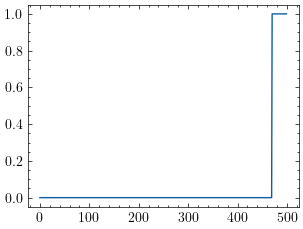

In [24]:
infos_df['current_collection_id'].plot()

<Axes: >

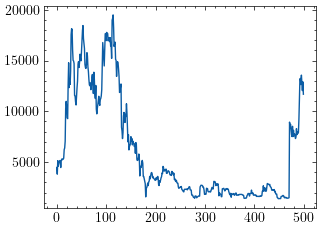

In [25]:
infos_df['current_price_usd'].plot()

<Axes: >

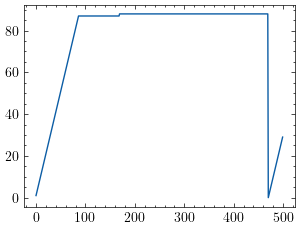

In [26]:
infos_df['nft_wallet'].plot()

<Axes: >

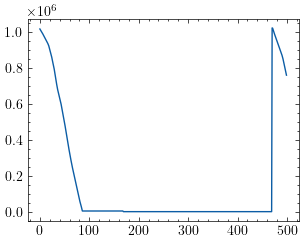

In [27]:
infos_df['usd_wallet'].plot()